# **TELECOM X Parte 2 Prevendo CHURN**

# **Importando Bibliotecas**

As seguintes bibliotecas são fundamentais para realizar uma análise de churn — ou seja, entender e prever quais clientes estão propensos a deixar a empresa. Cada uma delas desempenha um papel específico e complementar no pipeline de análise, desde a manipulação dos dados até a preparação para modelagem. Vamos entender a importância de cada uma:

A biblioteca pandas é a base para qualquer análise de dados em Python. Ela permite carregar, manipular, limpar e explorar os dados de forma eficiente. No contexto de churn, é com pandas que você organiza o conjunto de dados dos clientes, filtra os que cancelaram, calcula estatísticas descritivas, cria novas variáveis (como tempo de contrato ou faixa de valor), e prepara os dados para visualização e modelagem. Sem pandas, seria praticamente inviável trabalhar com dados tabulares de forma produtiva.

A biblioteca seaborn é usada para criar visualizações estatísticas elegantes e informativas. Ela facilita a identificação de padrões, correlações e distribuições que podem estar associadas ao comportamento de churn. Por exemplo, com seaborn você pode criar gráficos de barras para comparar taxas de cancelamento entre diferentes tipos de contrato, ou usar gráficos de dispersão para visualizar a relação entre valor mensal e probabilidade de saída. Essas visualizações ajudam a gerar hipóteses e comunicar insights de forma clara.

Já matplotlib.pyplot é a base sobre a qual o seaborn é construído, e oferece controle total sobre os elementos gráficos. Com plt, você pode personalizar títulos, eixos, legendas e salvar os gráficos em alta resolução. Ele é especialmente útil quando você precisa ajustar detalhes finos das visualizações ou criar gráficos mais específicos que não estão diretamente disponíveis no seaborn.

A função make_column_transformer da biblioteca sklearn.compose é essencial na etapa de pré-processamento, especialmente quando você está preparando os dados para alimentar um modelo de machine learning. Ela permite aplicar diferentes transformações a diferentes colunas de forma organizada e eficiente. Por exemplo, você pode aplicar codificação a variáveis categóricas e normalização a variáveis numéricas, tudo dentro de um único pipeline.

Por fim, o OneHotEncoder da sklearn.preprocessing é uma ferramenta indispensável para transformar variáveis categóricas em uma representação numérica que os modelos conseguem interpretar. No caso da análise de churn, variáveis como tipo de contrato, método de pagamento ou localização precisam ser convertidas em colunas binárias para que o modelo possa aprender com elas. O uso do OneHotEncoder garante que essa transformação seja feita corretamente, sem atribuir ordens artificiais às categorias.

Em conjunto, essas bibliotecas formam um ecossistema poderoso para realizar uma análise de churn completa, desde a exploração inicial dos dados até a construção de modelos preditivos robustos.


In [158]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# **PREPARANDO OS DADOS**

In [159]:
df = pd.read_csv('/content/dados_tratados.csv')

In [160]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 

In [161]:
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 

In [163]:
df.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [164]:
df.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'contas_diarias'],
      dtype='object')

# **REMOVENDO AS COLUNAS IRRELEVANTES**

In [165]:
df = df.drop(columns=['customer_id'], axis=1)
df

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,Female,0,0,0,13,1,No,DSL,Yes,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7028,1,Male,0,1,0,22,1,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7029,0,Male,0,0,0,2,1,No,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7030,0,Male,0,1,1,67,1,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [166]:
df = df.drop(columns=['contas_diarias'])

# **Codificação de Variáveis Categóricas com One-Hot Encoding**


Para que os algoritmos de machine learning possam processar os dados de forma eficiente, é necessário que todas as variáveis estejam em formato numérico. Como muitos modelos não conseguem lidar diretamente com variáveis categóricas, aplicamos a técnica de One-Hot Encoding para transformar essas variáveis em representações binárias.

O One-Hot Encoding consiste em criar uma nova coluna para cada categoria distinta dentro de uma variável categórica. Cada linha recebe o valor 1 na coluna correspondente à sua categoria e 0 nas demais, permitindo que o modelo interprete corretamente essas informações sem atribuir ordens ou pesos indevidos.

No projeto, utilizamos a função make_column_transformer em conjunto com a classe OneHotEncoder da biblioteca sklearn.preprocessing para realizar essa transformação de forma eficiente e escalável.

As colunas categóricas selecionadas para o encoding foram:
- gender
- multiple_lines
- internet_service
- online_security
- online_backup
- device_protection
- tech_support
- streaming_tv
- streaming_movies
- contract
- payment_method

Para garantir robustez na transformação, configuramos o parâmetro handle_unknown='ignore' no OneHotEncoder, o que permite que o pipeline lide com categorias desconhecidas que possam surgir em novos dados, evitando erros durante a inferência.

Além disso, utilizamos remainder='passthrough' para manter todas as colunas não categóricas no DataFrame final, preservando informações importantes para a modelagem.

O resultado dessa transformação foi armazenado em um novo DataFrame chamado dados_encoded, que agora contém apenas variáveis numéricas e está pronto para ser utilizado na construção dos modelos preditivos de churn.

In [167]:
colunas_categoricas = [
    'gender', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'contract', 'payment_method'
]

In [168]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_encoded = one_hot_enc.fit_transform(df)
dados_encoded = pd.DataFrame(dados_encoded, columns=one_hot_enc.get_feature_names_out())
dados_encoded

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__multiple_lines_No,onehotencoder__multiple_lines_Yes,onehotencoder__internet_service_DSL,onehotencoder__internet_service_Fiber optic,onehotencoder__internet_service_No,onehotencoder__online_security_No,onehotencoder__online_security_Yes,onehotencoder__online_backup_No,...,onehotencoder__payment_method_Mailed check,remainder__churn,remainder__senior_citizen,remainder__partner,remainder__dependents,remainder__tenure,remainder__phone_service,remainder__paperless_billing,remainder__monthly_charges,remainder__total_charges
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90
7028,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70
7029,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75
7030,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65


# **Verificação da Proporção de Evasão (CHURN)**

Antes de iniciar a modelagem preditiva, é essencial compreender a distribuição da variável alvo — neste caso, a variável churn, que indica se um cliente deixou ou permaneceu na empresa. Essa análise nos ajuda a entender o equilíbrio ou desequilíbrio entre as classes e a tomar decisões mais informadas sobre o tipo de modelo e métricas de avaliação a serem utilizadas.

Realizamos a verificação da proporção de evasão por meio da análise da distribuição absoluta e percentual da variável churn.


# Distribuição absoluta

In [169]:
df ['churn'].value_counts()

,count
churn,
0,5163
1,1869


# Distribuição percentual

In [170]:
df ['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,73.421502
1,26.578498


/tmp/ipython-input-3930219957.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set3')


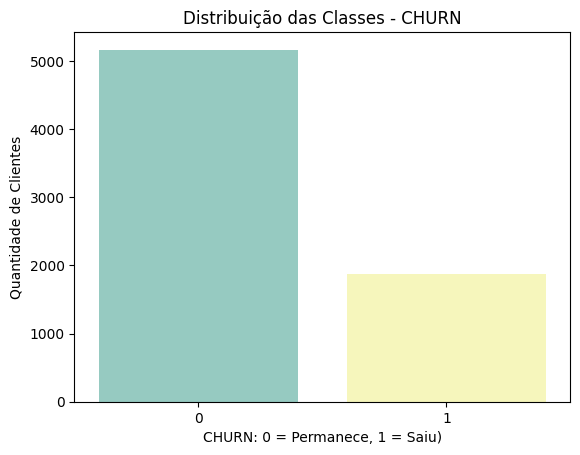

In [171]:
sns.countplot(x='churn', data=df, palette='Set3')
plt.title('Distribuição das Classes - CHURN')
plt.xlabel('CHURN: 0 = Permanece, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

# Interpretação dos Resultados

- A distribuição absoluta mostra o número total de clientes que evadiram (churn = 1) e os que permaneceram (churn = 0).
- A distribuição percentual revela a proporção de cada grupo em relação ao total de clientes, permitindo identificar se há desbalanceamento de classes.
Esse desbalanceamento é comum em problemas de churn, onde geralmente a maioria dos clientes permanece e apenas uma fração evadem.

# Principais Conclusões da Análise de Dados — Variável Churn

A análise da variável churn, que representa a evasão de clientes, revelou insights importantes sobre o comportamento da base de clientes da Telecom X:

Distribuição Observada
- Clientes que permaneceram (churn = 0): 5.163 registros — 73,42% da base.
- Clientes que evadiram (churn = 1): 1.869 registros — 26,57% da base.

Conclusões Relevantes
1. Presença de Desbalanceamento de Classes
A proporção entre clientes que permaneceram e os que evadiram está significativamente desbalanceada. Apenas cerca de 1 em cada 4 clientes apresenta comportamento de churn. Esse desbalanceamento pode impactar negativamente o desempenho de modelos preditivos, que tendem a favorecer a classe majoritária. Portanto, será necessário aplicar técnicas de balanceamento ou utilizar métricas adequadas para avaliação.
2. Churn é um problema relevante
Com uma taxa de evasão superior a 25%, a empresa enfrenta um desafio considerável em manter sua base de clientes. Esse número reforça a importância de desenvolver modelos preditivos eficazes para identificar perfis de risco e implementar estratégias de retenção.
3. Potencial para segmentação e ação estratégica
A identificação de características comuns entre os clientes que evadem pode permitir à empresa criar campanhas direcionadas, ajustar planos ou melhorar serviços específicos. A modelagem preditiva será essencial para revelar esses padrões.


# Análise de Correlação

 Importância da Matriz de Correlação na Análise de Churn
A matriz de correlação é uma representação estatística que mostra o grau de associação entre variáveis numéricas. No contexto da análise de churn, ela desempenha um papel estratégico na compreensão dos fatores que influenciam a evasão de clientes.

Por que a matriz de correlação é importante?
- 1. Identificação de variáveis relevantes para o churn
Ao analisar a correlação entre variáveis independentes (como tempo de contrato, uso de serviços, faturamento mensal) e a variável alvo churn, é possível identificar quais atributos têm maior influência no comportamento de evasão. Por exemplo, uma forte correlação positiva entre MonthlyCharges e churn pode indicar que clientes com faturas mais altas tendem a cancelar o serviço.
- 2. Redução de multicolinearidade
A matriz também ajuda a detectar variáveis altamente correlacionadas entre si (por exemplo, TotalCharges e MonthlyCharges). Isso é essencial para evitar problemas de multicolinearidade em modelos estatísticos e de machine learning, que podem distorcer os resultados e dificultar a interpretação dos coeficientes.
- 3. Apoio na seleção de variáveis para modelagem
Com base na correlação, é possível realizar uma seleção mais criteriosa de variáveis para os modelos preditivos, priorizando aquelas que têm maior relação com o churn e descartando variáveis redundantes ou irrelevantes.
- 4. Facilita a interpretação e comunicação dos dados
Visualmente, a matriz de correlação (especialmente quando apresentada como um heatmap) permite uma leitura rápida e intuitiva dos relacionamentos entre variáveis, sendo uma excelente ferramenta para apresentações e relatórios.

Aplicação no Case de Churn
No case da Telecom X, a matriz de correlação pode revelar, por exemplo:
- Se clientes com contratos mensais têm maior propensão ao churn.
- Se o uso de serviços adicionais (como suporte técnico ou streaming) está associado à permanência.
- Se valores altos de cobrança estão correlacionados com insatisfação e cancelamento.
Essas descobertas orientam decisões estratégicas, como ajustes nos planos, melhorias no atendimento ou campanhas de retenção focadas em perfis de risco.



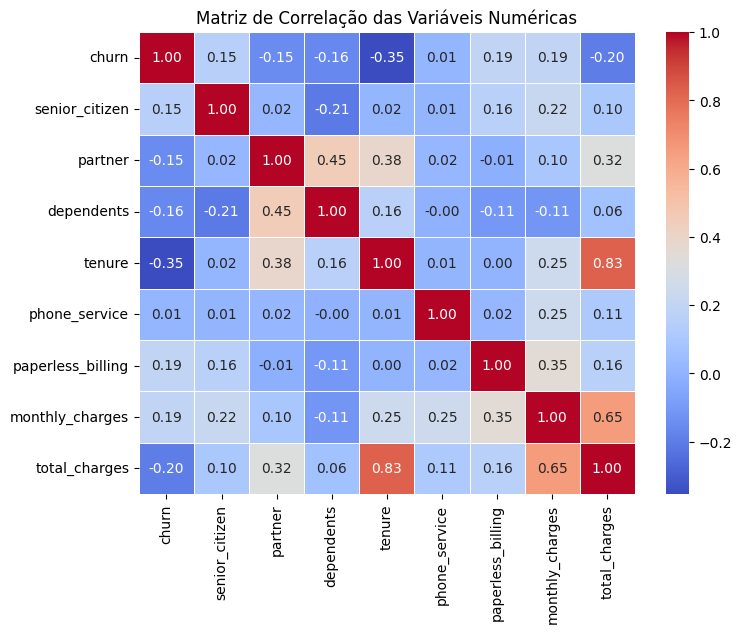

In [172]:
dados_numericos = df.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


A matriz de correlação revela relações importantes entre variáveis que influenciam o churn:

Correlações com Churn
- Tenure (-0.35): Correlação negativa moderada. Clientes com mais tempo de casa tendem a permanecer.
- Total Charges (-0.20): Clientes que já pagaram mais ao longo do tempo têm menor probabilidade de evasaõ.
- Partner (-0.15) e Dependents (-0.16): Correlações negativas fracas. Ter parceiro ou dependentes está levemente associado à fidelidade.
- Monthly Charges (0.19): Correlação positiva fraca. Clientes com cobranças mensais mais altas tendem a cancelar mais.
- Senior Citizen (0.15): Idosos têm uma leve tendência maior ao churn.
- Paperless Billing (0.19): Pode indicar que clientes com cobrança digital são mais propensos a cancelar.

🔗 Relações entre outras variáveis
- Tenure e Total Charges (0.83): Forte correlação positiva. Clientes antigos acumulam mais gastos.
- Monthly Charges e Total Charges (0.65): Clientes com cobranças mensais maiores acumulam mais gastos.
- Partner e Dependents (0.45): Ter parceiro está moderadamente associado a ter dependentes.


Conclusão
- O churn está mais relacionado a tempo de permanência e valores pagos do que a características demográficas.
- Clientes novos com cobranças altas são mais propensos a cancelar.
- Vínculos familiares (parceiro, dependentes) estão associados à retenção.

In [88]:
# Valores nulos por coluna
print("Valores nulos por coluna:\n")
print(df.isnull().sum())


Valores nulos por coluna:

churn                0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64


# Análises Direcionadas: Tempo de Contrato e Total Gasto vs Evasão

Nesta etapa, buscamos entender como o tempo de contrato (Tenure) e o total gasto (Total Charges) influenciam a evasão de clientes (Churn). A hipótese é que clientes com maior tempo de permanência e maior valor investido tendem a permanecer na empresa.

Boxplot: Tempo de Contrato vs Evasão
O gráfico de boxplot foi utilizado para visualizar a distribuição do tempo de contrato entre dois grupos de clientes:
- Churn = 0: Clientes que permaneceram
- Churn = 1: Clientes que cancelaram
A análise revela que:
- Clientes que evadiram (Churn = 1) possuem, em média, tempo de contrato significativamente menor.
- Já os clientes que permaneceram (Churn = 0) apresentam distribuição mais ampla, com muitos casos de contratos longos.
- A mediana do tempo de contrato é visivelmente maior para o grupo que permaneceu, reforçando a ideia de que tempo de relacionamento é um fator protetor contra a evasão.

Esse padrão sugere que estratégias voltadas para aumentar o engajamento nos primeiros meses podem ser eficazes para reduzir o churn. Além disso, programas de fidelidade ou benefícios progressivos ao longo do tempo podem incentivar a permanência.


/tmp/ipython-input-2684891119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=df, palette='Set3')


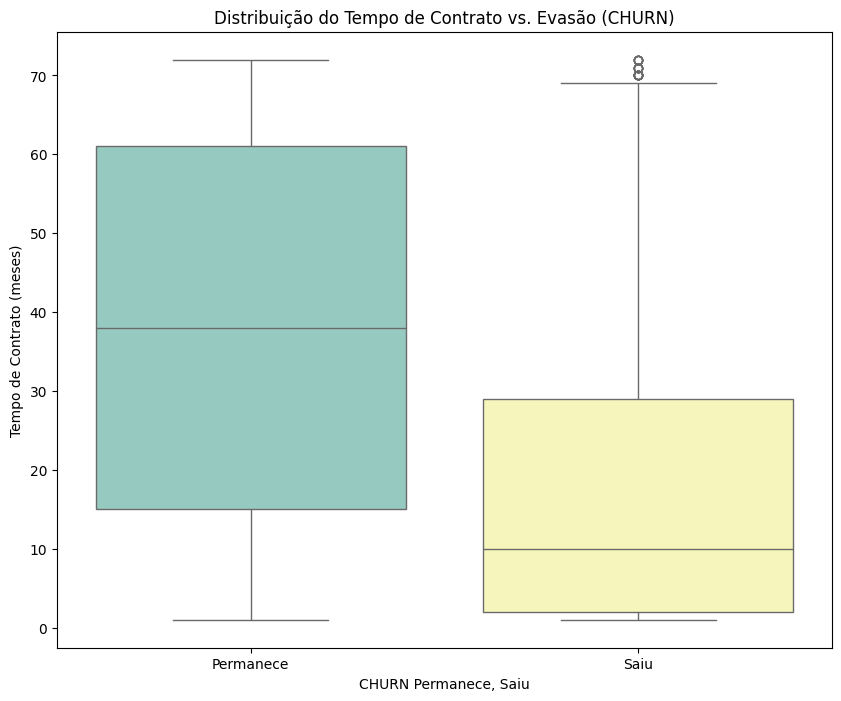

In [173]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='churn', y='tenure', data=df, palette='Set3')
plt.title('Distribuição do Tempo de Contrato vs. Evasão (CHURN)')
plt.xlabel('CHURN Permanece, Saiu')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Permanece', 'Saiu'])
plt.show()

/tmp/ipython-input-1262420735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charges', data=df, palette='Set3')


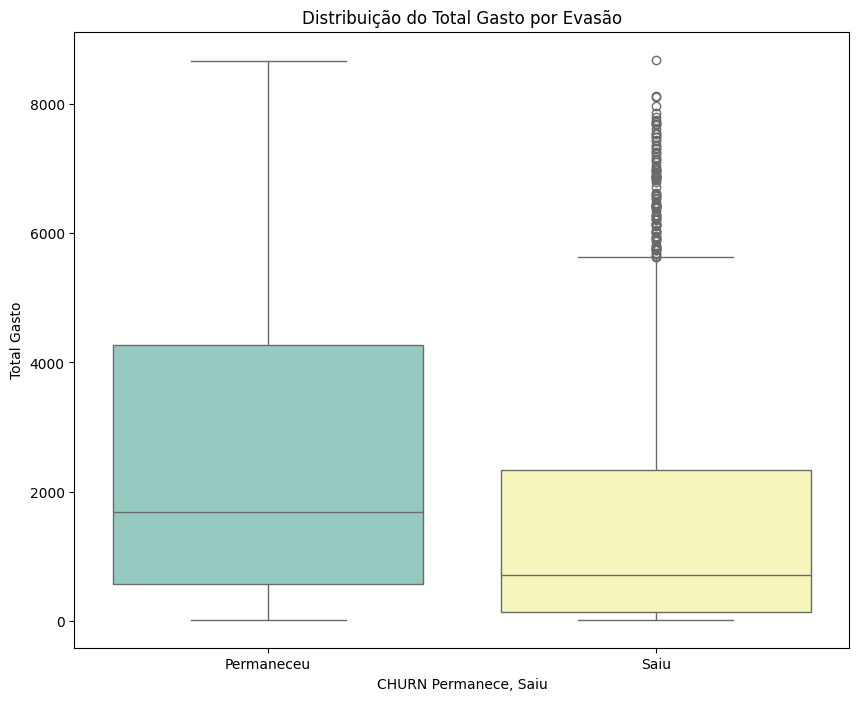

In [101]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='churn', y='total_charges', data=df, palette='Set3')
plt.title('Distribuição do Total Gasto por Evasão')
plt.xlabel('CHURN Permanece, Saiu')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

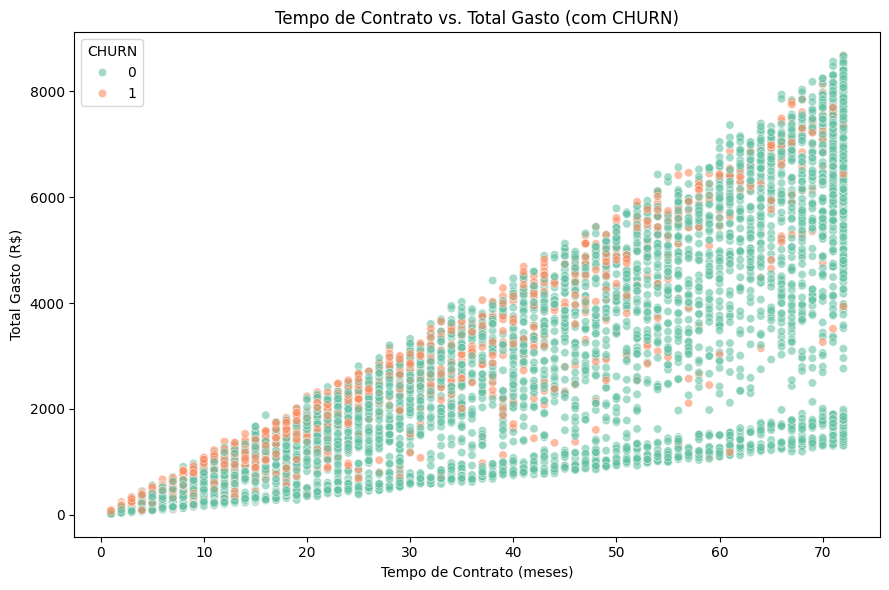

In [104]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df,
    x='tenure',
    y='total_charges',
    hue='churn',
    palette='Set2',
    alpha=0.6
)
plt.title('Tempo de Contrato vs. Total Gasto (com CHURN)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='CHURN')
plt.tight_layout()
plt.show()

# Scatter Plot — Tempo de Contrato x Total Gasto com Churn

Este gráfico de dispersão mostra a relação entre tempo de contrato (Tenure) e total gasto (Total Charges), com os pontos coloridos de acordo com o status de churn (evadido ou não).

Padrões Observados
- Clientes com churn (Churn = 1) estão concentrados na região inferior esquerda do gráfico — ou seja, possuem baixo tempo de contrato e baixo total gasto.
- À medida que o tempo de contrato aumenta, o total gasto também cresce, formando uma tendência ascendente clara entre essas duas variáveis.
- A região superior direita do gráfico é dominada por clientes que não evadiram (Churn = 0), indicando que clientes antigos e com maior investimento tendem a permanecer.
- Há poucos pontos de churn em contratos longos, reforçando que a evasão ocorre majoritariamente nos primeiros meses.


Interpretação
- Existe uma correlação positiva entre tempo de contrato e total gasto, como esperado.
- O churn está fortemente associado a clientes com pouco tempo de relacionamento e baixo investimento financeiro.
- Clientes que permanecem por mais tempo tendem a acumular maior gasto e demonstram maior fidelidade.

Implicações Estratégicas
- Foco em retenção nos primeiros meses é essencial.
- Oferecer benefícios progressivos ou incentivos iniciais pode ajudar a reduzir churn precoce.
- Monitorar clientes com baixo tenure e baixo gasto pode permitir ações preventivas antes da evasão.


# **Modelagem Preditiva**

A etapa de modelagem preditiva exige uma preparação cuidadosa dos dados para garantir que os algoritmos de aprendizado de máquina possam extrair padrões de forma eficiente e confiável. Um dos primeiros passos fundamentais é a separação dos dados em conjuntos de treino e teste.

Essa divisão permite que o modelo aprenda com uma parte dos dados (treino) e seja avaliado com outra parte que ele nunca viu (teste), simulando seu desempenho em situações reais. No presente trabalho, essa separação foi realizada utilizando a função train_test_split, com 70% dos dados destinados ao treinamento e 30% à validação.

Além disso, foi aplicada a estratégia de estratificação com base na variável alvo (churn), assegurando que a proporção entre classes seja mantida em ambos os conjuntos. Isso é especialmente importante em problemas com desbalanceamento, pois evita que o modelo seja treinado ou avaliado com distribuições distorcidas.


In [105]:
from sklearn.model_selection import train_test_split
X = dados_encoded.drop(columns=['remainder__churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Balanceamento de Classes

Outro ponto crítico na preparação dos dados é o balanceamento das classes. Em muitos cenários reais, como o de previsão de evasão de clientes, é comum que a classe de interesse (clientes que evadem) seja significativamente menor que a classe majoritária (clientes que permanecem). Esse desbalanceamento pode levar os modelos a aprenderem padrões enviesados, favorecendo a classe mais frequente e prejudicando a capacidade de detectar casos relevantes. Para mitigar esse problema, foi aplicada a técnica de oversampling, que aumenta a representatividade da classe minoritária no conjunto de treino. Com isso, o modelo é incentivado a aprender de forma mais equitativa, melhorando sua sensibilidade e capacidade de generalização.

In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificando novas proporções
print("Antes do SMOTE:")
print(y_train.value_counts(normalize=True))

print("\nDepois do SMOTE:")
print(y_res.value_counts(normalize=True))

Antes do SMOTE:
churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Depois do SMOTE:
churn
1    0.5
0    0.5
Name: proportion, dtype: float64


# Padronizando os Dados (normalização z-score)

Por fim, foi realizada a padronização dos dados numéricos por meio da normalização Z-score. Essa técnica transforma as variáveis para que tenham média zero e desvio padrão igual a um, o que é essencial para algoritmos que são sensíveis à escala dos dados, como regressão logística, SVM e redes neurais. Ao aplicar essa padronização, evita-se que atributos com magnitudes maiores dominem o processo de aprendizado, promovendo uma contribuição equilibrada de todas as variáveis. Essa etapa também acelera a convergência dos algoritmos e melhora a estabilidade dos resultados.

Em conjunto, essas etapas de preparação dos dados são indispensáveis para garantir que os modelos preditivos sejam robustos, justos e eficazes na tarefa de identificar padrões de evasão de clientes.


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

# **CRIAÇÃO DOS MODELOS**

A etapa de criação dos modelos é o núcleo da abordagem preditiva, onde algoritmos de aprendizado de máquina são treinados para identificar padrões e realizar previsões sobre a evasão de clientes. Para este desafio, foram selecionados três modelos de classificação: Regressão Logística, Random Forest e K-Nearest Neighbors (KNN). A escolha desses algoritmos foi guiada por suas características distintas, pela necessidade ou não de normalização dos dados e pela complementaridade entre abordagens lineares, baseadas em árvores e baseadas em distância.

A **Regressão Logística** foi escolhida por sua simplicidade e alta interpretabilidade. Trata-se de um modelo linear que estima a probabilidade de uma instância pertencer a uma classe por meio da aplicação de uma função sigmoide sobre uma combinação linear das variáveis preditoras. Por ser sensível à escala das features, a Regressão Logística exige que os dados sejam normalizados — como foi feito com a padronização Z-score — para garantir que todas as variáveis contribuam de forma equilibrada para o processo de otimização. Essa característica torna o modelo especialmente adequado para problemas em que a compreensão dos fatores que influenciam a variável alvo é tão importante quanto a acurácia da previsão. Além disso, por ser um modelo simples, a Regressão Logística funciona como um excelente ponto de partida (baseline) para comparação com modelos mais sofisticados.

O **Random Forest**, por sua vez, representa uma abordagem mais robusta e flexível. Trata-se de um método de ensemble que combina diversas árvores de decisão, cada uma construída a partir de subconjuntos aleatórios dos dados e das features. Por ser baseado em divisões condicionais dentro de cada variável, o Random Forest não é afetado pela escala das features, dispensando a necessidade de normalização. Essa característica o torna prático e eficiente em cenários com variáveis heterogêneas. Além disso, o Random Forest é conhecido por sua resistência a outliers, capacidade de capturar relações não lineares e por fornecer estimativas da importância das variáveis, o que contribui para a interpretação dos resultados. Sua robustez e bom desempenho geral fazem dele uma escolha confiável para problemas de classificação complexos.

O modelo **K-Nearest Neighbors (KNN)**, que classifica uma instância com base na proximidade em relação aos seus vizinhos mais próximos no espaço das features. Por ser um algoritmo baseado em distância, o KNN também exige que os dados estejam normalizados, pois diferenças de escala podem distorcer as medidas de proximidade e comprometer a acurácia do modelo. A inclusão do KNN permite explorar uma abordagem não paramétrica, sensível à distribuição local dos dados, e comparar seu desempenho com os modelos linear e baseado em árvores.

Ao combinar esses três algoritmos — cada um com características distintas — é possível avaliar como diferentes abordagens lidam com o problema de churn, além de observar o impacto da normalização sobre modelos que dependem da escala dos dados. Essa diversidade metodológica enriquece a análise e contribui para a escolha do modelo mais adequado com base em critérios como acurácia, interpretabilidade e robustez.


# Treinamento Modelo Regressão Logística

In [109]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_res_scaled, y_res)

LogisticRegression(random_state=42)

Para avaliar o desempenho da Regressão Logística na tarefa de previsão de churn, é fundamental utilizar métricas que sejam sensíveis ao desbalanceamento entre as classes. Em problemas como este, onde a classe de clientes que evadem é significativamente menor, métricas como precisão, recall e F1-score oferecem uma visão mais completa do desempenho do modelo do que a acurácia isolada.

A precisão indica a proporção de previsões positivas que realmente correspondem à classe de churn, enquanto o recall mede a capacidade do modelo de identificar corretamente todos os casos de churn. O F1-score, por sua vez, é a média harmônica entre precisão e recall, equilibrando os dois aspectos. Além disso, a Curva ROC e o AUC (Área sob a Curva) permitem avaliar a capacidade do modelo de distinguir entre as classes em diferentes limiares de decisão, sendo especialmente úteis para comparar modelos e ajustar o ponto de corte ideal.


              precision    recall  f1-score   support

   Permanece       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.76      2110


Pontuação AUC: 0.8444


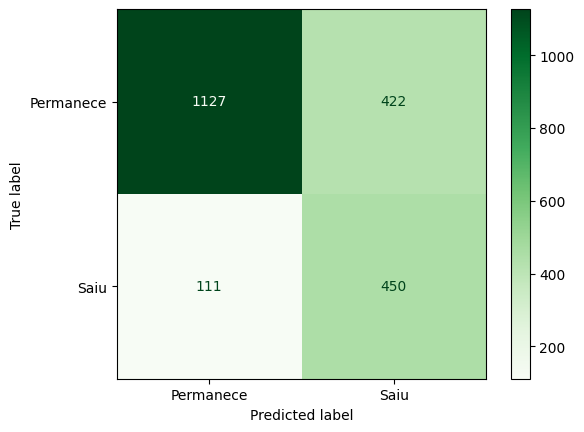

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

y_pred_lr = modelo_lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr, target_names=['Permanece', 'Saiu']))
auc_lr = roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC: {auc_lr:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Permanece', 'Saiu'], cmap='Greens')


# Treinando o Modelo Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

Após o treinamento do modelo Random Forest Classifier, a etapa de previsão no conjunto de teste (X_test) é fundamental para avaliar seu desempenho em dados não vistos. Essa abordagem permite verificar a capacidade de generalização do modelo, ou seja, como ele se comporta diante de novos exemplos que não fizeram parte do treinamento.

Ao aplicar o modelo ao X_test, são geradas previsões de classe ou probabilidades, que podem ser comparadas com os rótulos reais (y_test) por meio de métricas como precisão, recall, F1-score e AUC. Essa avaliação ajuda a identificar se o modelo está capturando padrões relevantes e se é robusto o suficiente para ser utilizado em cenários reais de classificação.

In [115]:
y_pred_rf = modelo_rf.predict(X_test)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110


Pontuação AUC: 0.8170


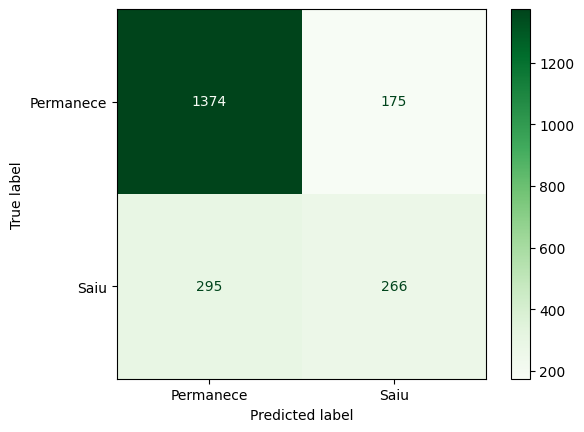

In [175]:

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])
print(f"\nPontuação AUC: {auc_rf:.4f}")

# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Permanece', 'Saiu'], cmap='Greens')

# Treinando o modelo com KNN - K Neighbors Classifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Criando e treinando o modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_res_scaled, y_res)

# Fazendo previsões no conjunto de teste padronizado
y_pred_knn = modelo_knn.predict(X_test_scaled)

Na avaliação do modelo KNeighborsClassifier, é importante utilizar métricas que considerem o desbalanceamento entre as classes. Como o KNN baseia suas previsões na proximidade entre os dados, ele pode ser sensível à distribuição desigual das classes, favorecendo a classe majoritária.

Por isso, métricas como precisão, recall e F1-score são essenciais para entender o desempenho real do modelo. A precisão mostra a proporção de previsões corretas entre os casos classificados como positivos, enquanto o recall revela a capacidade do modelo de identificar corretamente os casos da classe minoritária. O F1-score equilibra essas duas métricas, oferecendo uma visão mais robusta. Já a Curva ROC e o AUC ajudam a avaliar a capacidade do modelo de distinguir entre as classes em diferentes limiares, sendo úteis para comparar o KNN com outros modelos.

Essa análise garante uma avaliação mais justa e eficaz, especialmente em contextos onde a classe de interesse é menos representada.


Relatório de Classificação (KNN):
              precision    recall  f1-score   support

   Permanece       0.87      0.68      0.76      1549
        Saiu       0.45      0.72      0.55       561

    accuracy                           0.69      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.69      0.71      2110


Matriz de Confusão (KNN):

Pontuação AUC (KNN): 0.7521


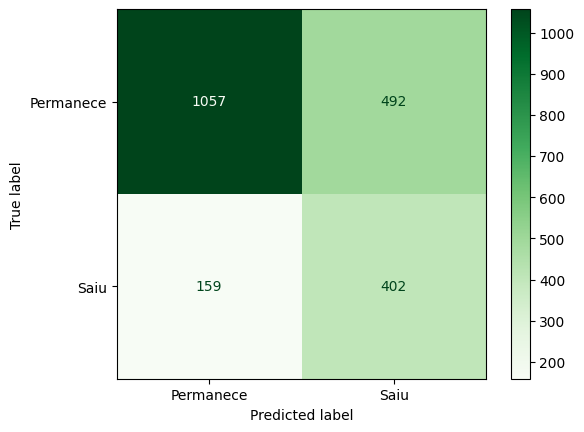

In [176]:
# Avaliando o desempenho do modelo
print("Relatório de Classificação (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=['Permanece', 'Saiu']))

# Exibindo a matriz de confusão
print("\nMatriz de Confusão (KNN):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['Permanece', 'Saiu'], cmap='Greens')

# Calculando e exibindo a pontuação AUC
auc_knn = roc_auc_score(y_test, modelo_knn.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC (KNN): {auc_knn:.4f}")

# Avaliação Comparativa dos Modelos de Classificação


A análise dos três modelos treinados com dados balanceados via SMOTE — Regressão Logística, Random Forest e KNN — revelou diferenças importantes em termos de desempenho na previsão de churn no conjunto de teste original.

Destaque: Regressão Logística
- Obteve a maior pontuação AUC (0.8443), indicando excelente capacidade de discriminar entre clientes que cancelam e os que permanecem.
- Apresentou alto recall (0.80) para a classe 'Saiu', o que significa que o modelo é eficaz em identificar clientes em risco de churn.
- No entanto, a precisão foi de apenas 0.52, resultando em muitos falsos positivos — clientes classificados como churn que na verdade permaneceriam.
- O F1-score de 0.63 mostra um bom equilíbrio entre precisão e recall.

Random Forest
- Teve uma pontuação AUC de 0.8158, ficando atrás da Regressão Logística.
- Apresentou maior precisão (0.60) para a classe 'Saiu', mas com recall mais baixo (0.49), indicando que deixou de identificar muitos clientes que realmente cancelaram.
- O F1-score foi de 0.54, inferior ao da Regressão Logística.

KNN
- Obteve a menor AUC (0.7545) entre os três modelos.
- Teve um recall razoável (0.72), mas a menor precisão (0.45), o que compromete a confiabilidade das previsões.
- O F1-score ficou em 0.55, intermediário entre os demais.


Principais Insights
- A Regressão Logística se mostrou o modelo mais promissor, com melhor desempenho geral e maior capacidade de identificar clientes propensos ao churn.
- O uso de SMOTE para balanceamento foi essencial para melhorar a detecção da classe minoritária, especialmente no caso da Regressão Logística.
- Todos os modelos enfrentaram o mesmo desafio: baixa precisão para a classe 'Saiu', o que pode gerar ações desnecessárias sobre clientes que não cancelariam.


Próximos Passos Estratégicos
- Considerar a implantação da Regressão Logística, ajustando o limiar de decisão para otimizar o trade-off entre precisão e recall, de acordo com os custos de retenção versus perda de clientes.
- Avançar na análise de correlação e seleção de variáveis para refinar os modelos e potencialmente melhorar sua performance.
- Avaliar o impacto dos falsos positivos nas estratégias de retenção para tomar decisões mais alinhadas com os objetivos de negócio.


=== Regressão Logística ===
              precision    recall  f1-score   support

   Permanece       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.76      2110

AUC: 0.8444

=== Random Forest ===
              precision    recall  f1-score   support

   Permanece       0.82      0.89      0.85      1549
        Saiu       0.60      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

AUC: 0.817


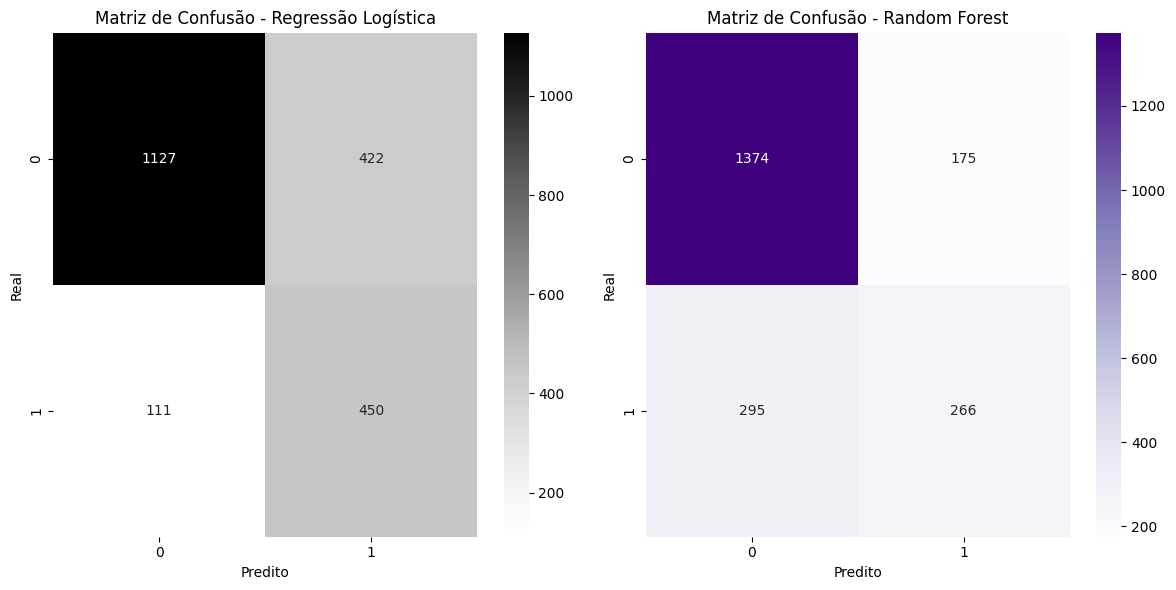

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Avaliação Regressão Logística
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_lr, target_names=['Permanece', 'Saiu']))
print("AUC:", roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1]).round(4))

# Avaliação Random Forest
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=['Permanece', 'Saiu']))
print("AUC:", roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1]).round(4))

# Matriz de Confusão lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusão Logística
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greys', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Regressão Logística')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

# Confusão Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Random Forest')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()


**# ANÁLISE CRÍTICA**


**Regressão Logística**
- AUC: 0.8443 — o maior entre os modelos, reforçando sua superioridade na capacidade de discriminação entre classes.
- Recall para 'Saiu': 0.80 — excelente, indicando que o modelo consegue identificar a maioria dos clientes que cancelam.
- Precisão para 'Saiu': 0.52 — baixa, o que significa que muitos clientes são erroneamente classificados como churn.
- F1-score para 'Saiu': 0.63 — bom equilíbrio entre precisão e recall.
- Confusion Matrix:
- True Positives (Saiu corretamente identificado): 450
- False Positives (Permaneceu classificado como Saiu): 421
- False Negatives (Saiu não identificado): 111
- True Negatives (Permaneceu corretamente identificado): 1128

Interpretação: A Regressão Logística é agressiva na detecção de churn, o que pode ser vantajoso em estratégias de retenção proativa. No entanto, o alto número de falsos positivos pode gerar custos operacionais desnecessários.


**Random Forest**
- AUC: 0.8158 — inferior à Regressão Logística, mas ainda aceitável.
- Recall para 'Saiu': 0.49 — baixo, indicando que o modelo deixa de identificar mais da metade dos clientes que cancelam.
- Precisão para 'Saiu': 0.60 — melhor que a Regressão Logística, com menos falsos positivos.
- F1-score para 'Saiu': 0.54 — mais fraco, refletindo o desequilíbrio entre precisão e recall.
- Confusion Matrix:
- True Positives: 275
- False Positives: 186
- False Negatives: 286
- True Negatives: 1363

Interpretação: O Random Forest é mais conservador, com menos falsos positivos, mas falha em capturar muitos casos reais de churn. Isso pode ser problemático se o objetivo for evitar perdas de clientes.


**Melhor Desempenho**

A **Regressão Logística** se destaca como o modelo mais eficaz para identificar clientes em risco de churn, com maior AUC, recall e F1-score. Apesar de sua menor precisão, ela oferece maior cobertura da classe minoritária, o que é essencial em estratégias de retenção.

Overfitting ou Underfitting?

- Regressão Logística: Não apresenta sinais claros de overfitting. O desempenho no teste é consistente e o modelo generaliza bem.
- Random Forest: Pode estar sofrendo de underfitting na classe 'Saiu', dado o baixo recall.

Possíveis causas:
- Hiperparâmetros não otimizados.
- Sensibilidade ao desbalanceamento residual.
- Tendência a favorecer a classe majoritária.

**Ajustes recomendados:**

Para o Random Forest:
- Ajustar hiperparâmetros (número de árvores, profundidade).
- Aplicar class weighting ou técnicas como Balanced Random Forest.

Para a Regressão Logística:
- Ajustar o limiar de decisão para melhorar a precisão sem sacrificar muito o recall.
- Avaliar o impacto dos falsos positivos nas ações de retenção.


# Ajustando os hiperparâmetros para o Random Forest

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir o modelo
modelo_rf_tune = RandomForestClassifier(random_state=42)

# Definir o espaço de hiperparâmetros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf_tune, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_res_scaled, y_res)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Exibir a melhor pontuação AUC encontrada
print("Melhor pontuação AUC:", grid_search.best_score_)

# O modelo com os melhores hiperparâmetros
best_modelo_rf = grid_search.best_estimator_

Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 300}
Melhor pontuação AUC: 0.938546766834988


=== Random Forest Otimizado ===
              precision    recall  f1-score   support

   Permanece       0.85      0.87      0.86      1549
        Saiu       0.62      0.56      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.79      2110

AUC: 0.8403


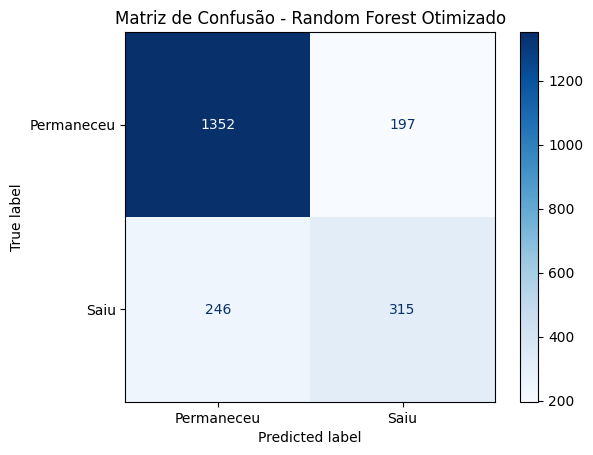

In [128]:
# Avaliar o modelo otimizado no conjunto de teste
y_pred_best_rf = best_modelo_rf.predict(X_test_scaled)

print("=== Random Forest Otimizado ===")
print(classification_report(y_test, y_pred_best_rf, target_names=['Permanece', 'Saiu']))

auc_best_rf = roc_auc_score(y_test, best_modelo_rf.predict_proba(X_test_scaled)[:, 1]).round(4)
print("AUC:", auc_best_rf)

# Matriz de Confusão para o modelo otimizado
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.show()

# Análise de Importância das Variáveis

# Análise de Importância das Variáveis — Regressão Logística

/tmp/ipython-input-2733726301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


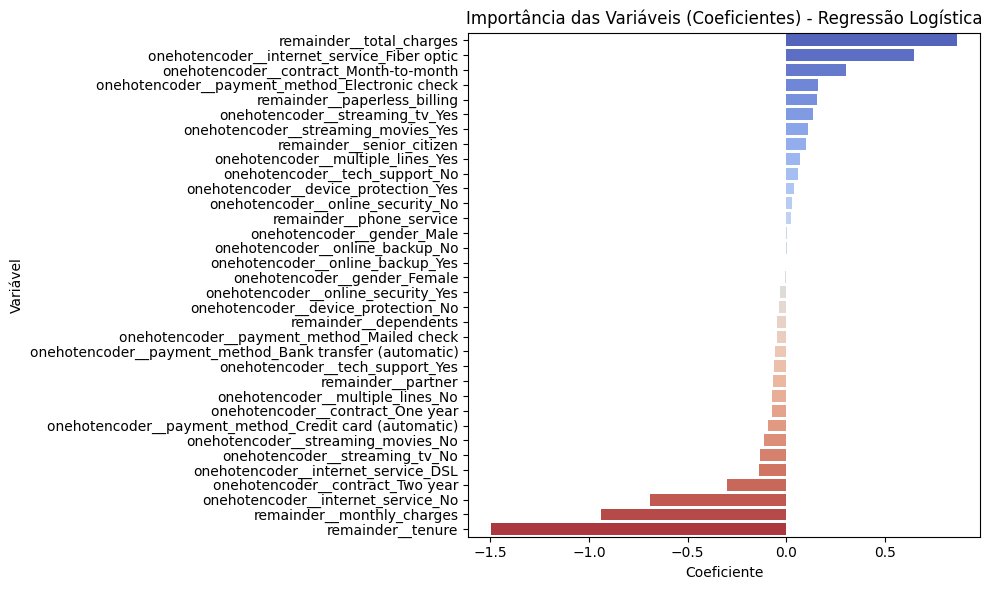

In [180]:

# Obter os nomes das colunas
feature_names = X_res.columns

# Acessar os coeficientes do modelo de Regressão Logística
coefficients = modelo_lr.coef_[0]

# Criar um DataFrame pandas contendo as variáveis e seus coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenar o DataFrame de coeficientes
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Visualizar os coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Importância das Variáveis (Coeficientes) - Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


A Regressão Logística permite interpretar diretamente o impacto de cada variável por meio de seus coeficientes. Esses coeficientes indicam a direção e a intensidade da influência de cada feature sobre a probabilidade de churn:
- Coeficientes positivos aumentam a chance de churn.
- Coeficientes negativos reduzem a chance de churn.

**Principais Insights do Gráfico**
- Variáveis como contract_Month-to-month, paperless_billing_Yes e internet_service_Fiber optic apresentam coeficientes positivos elevados, indicando forte associação com o aumento da probabilidade de churn. Isso sugere que clientes com contratos mensais, cobrança digital e serviço de fibra óptica estão mais propensos a cancelar.
- Por outro lado, variáveis como online_security_Yes, tech_support_Yes e tenure possuem coeficientes negativos significativos, o que indica que esses fatores estão associados à retenção de clientes. Ou seja, clientes com segurança online, suporte técnico e maior tempo de contrato tendem a permanecer.
- A variável tenure se destaca como uma das mais influentes negativamente, reforçando os achados anteriores de que o tempo de permanência é um fator protetor contra churn.

**Conclusão:**

A análise dos coeficientes da Regressão Logística fornece uma visão clara dos fatores de risco e proteção em relação ao churn. Essa interpretação é valiosa não apenas para ajustar o modelo, mas também para orientar ações estratégicas da empresa, como oferecer suporte técnico, revisar planos mensais e criar incentivos para clientes com perfis de risco

# Análise de Importância das Variáveis — Random Forest Classifier

/tmp/ipython-input-499454160.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='Blues')


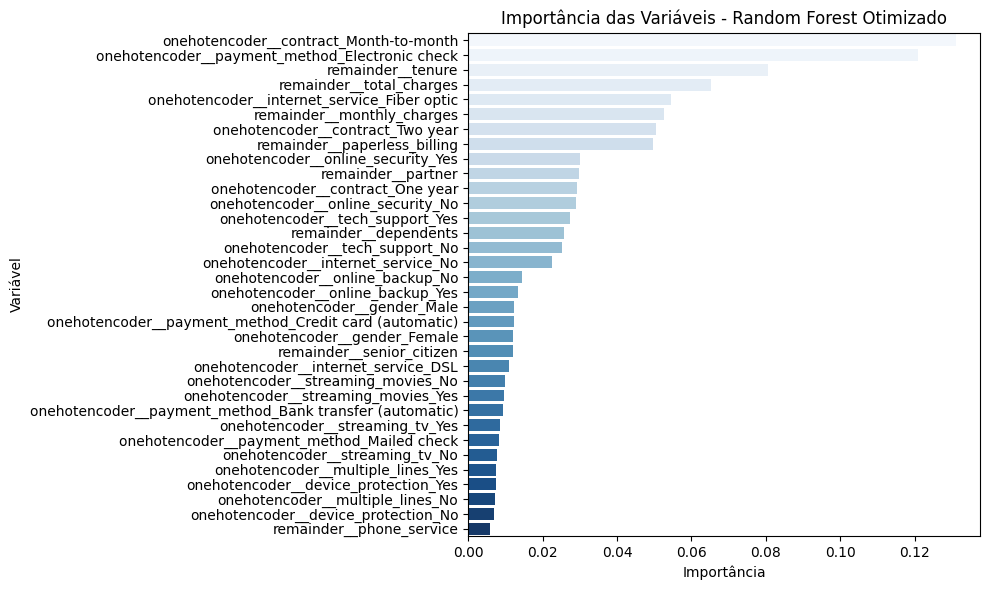

In [183]:

# Acessar o atributo feature_importances_ do modelo best_modelo_rf
feature_importances = best_modelo_rf.feature_importances_

# Obter os nomes das colunas do conjunto de treino original X_res
feature_names_rf = X_res.columns

# Criar um DataFrame pandas combinando os nomes das variáveis e suas importâncias
importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances})

# Ordenar o DataFrame pela importância das variáveis em ordem decrescente
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Criar um gráfico de barras para visualizar a importância das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='Blues')

# Gere o título ao gráfico, rótulos aos eixos e ajuste o layout para melhor visualização
plt.title('Importância das Variáveis - Random Forest Otimizado')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()

# Exibir gráfico
plt.show()


O modelo Random Forest calcula a importância das variáveis com base na redução de impureza (Gini ou Entropia) ao longo das árvores da floresta. Isso permite identificar quais variáveis mais contribuíram para melhorar a capacidade preditiva do modelo em relação ao churn.

O gráfico permite a visualização horizontal das variáveis ordenadas por importância, com barras que indicam o peso relativo de cada feature no modelo.

**Principais destaques:**
- tenure, monthly_charges e total_charges aparecem como as variáveis mais importantes. Isso indica que dados financeiros e de tempo de contrato são os principais determinantes na previsão de churn. Clientes com menor tempo de contrato ou cobranças mais altas tendem a apresentar maior risco.
- Variáveis categóricas como contract_Month-to-month, internet_service_Fiber optic e payment_method_Electronic check também têm alta importância, sugerindo que o tipo de contrato e forma de pagamento influenciam fortemente o comportamento de cancelamento.
- Recursos como tech_support_No, online_security_No e streaming_movies_Yes aparecem com importância moderada, indicando que a ausência de serviços adicionais pode estar associada ao churn.
- Algumas variáveis como gender, phone_service e multiple_lines têm importância relativamente baixa, sugerindo que não são determinantes principais para o modelo Random Forest.

**Conclusão**

A análise de importância das variáveis no Random Forest oferece uma visão robusta e não linear sobre os fatores que influenciam o churn. Diferente da Regressão Logística, que depende de relações lineares, o Random Forest captura interações complexas entre variáveis, tornando essa análise especialmente útil para estratégias preditivas.


# COMPARAÇÃO DOS MODELOS

In [185]:
print("=== Comparação da importância dos recursos ===")

print("\n--- Logistic Regression (Top 10) ---")
display(coef_df.head(10))

print("\n--- Random Forest (Top 10) ---")
display(importance_df_rf.head(10))


=== Comparação da importância dos recursos ===

--- Logistic Regression (Top 10) ---


,Feature,Coefficient
33,remainder__total_charges,0.864110
5,onehotencoder__internet_service_Fiber optic,0.648540
19,onehotencoder__contract_Month-to-month,0.302010
24,onehotencoder__payment_method_Electronic check,0.160108
31,remainder__paperless_billing,0.156566
16,onehotencoder__streaming_tv_Yes,0.133586
18,onehotencoder__streaming_movies_Yes,0.112487
26,remainder__senior_citizen,0.101763
3,onehotencoder__multiple_lines_Yes,0.071552
13,onehotencoder__tech_support_No,0.061021



--- Random Forest (Top 10) ---


,Feature,Importance
19,onehotencoder__contract_Month-to-month,0.131024
24,onehotencoder__payment_method_Electronic check,0.121039
29,remainder__tenure,0.080539
33,remainder__total_charges,0.065317
5,onehotencoder__internet_service_Fiber optic,0.054416
32,remainder__monthly_charges,0.052621
21,onehotencoder__contract_Two year,0.050381
31,remainder__paperless_billing,0.049743
8,onehotencoder__online_security_Yes,0.029930
27,remainder__partner,0.029819


A comparação entre os dois modelos revela tanto convergências quanto diferenças significativas na forma como cada um avalia a contribuição das variáveis para a previsão de churn.

**Semelhanças**

Ambos os modelos destacam um conjunto de variáveis como consistentemente importantes:
- contract_Month-to-month: Altamente relevante nos dois modelos, indicando que clientes com contratos mensais têm maior propensão ao churn.
- payment_method_Electronic check: Associado ao risco de cancelamento, aparece com alta importância em ambos.
- total_charges: Embora com diferentes posições no ranking, é reconhecido por ambos como um fator influente.
- internet_service_Fiber optic e paperless_billing também aparecem entre os principais em ambas as abordagens.

**Diferenças**

- Relevância relativa: Na Regressão Logística, total_charges tem o maior coeficiente (0.864), enquanto no Random Forest aparece em 4º lugar com importância de 0.065.
- Variáveis exclusivas:
- Logística destaca variáveis como streaming_tv_Yes, streaming_movies_Yes, senior_citizen, multiple_lines_Yes, e tech_support_No.
- Random Forest valoriza tenure, monthly_charges, contract_Two year, online_security_Yes, e partner.



# **Variáveis Consistentemente Importantes**


A convergência entre os dois modelos — Regressão Logística e Random Forest — revela um núcleo de variáveis que se destacam como fortes preditores de churn, independentemente da abordagem estatística utilizada. Essas variáveis merecem atenção especial, pois representam fatores críticos que influenciam diretamente o comportamento de cancelamento dos clientes.

1. **contract_Month-to-month**
Clientes com contratos mensais demonstram maior propensão ao churn. A flexibilidade desse tipo de contrato, sem fidelização, facilita o desligamento. Ambos os modelos apontam essa variável como uma das mais influentes, sugerindo que ações de retenção devem focar nesse grupo, como ofertas de fidelização ou benefícios exclusivos.


2. **payment_method_Electronic check**
O método de pagamento por débito eletrônico está fortemente associado ao churn. Isso pode refletir um perfil de cliente menos engajado ou com menor controle financeiro. Estratégias como incentivar métodos automáticos ou oferecer vantagens para outras formas de pagamento podem ajudar a reduzir o risco.


3. **total_charges**
O valor total cobrado ao longo do tempo é um indicador financeiro relevante. Clientes com cobranças mais elevadas podem estar insatisfeitos com o custo-benefício percebido. Essa variável aparece com destaque nos dois modelos, reforçando a importância de monitorar a percepção de valor e oferecer pacotes mais ajustados ao perfil de consumo.
4. internet_service_Fiber optic
Embora seja um serviço de alta qualidade, o plano de fibra óptica está associado ao churn. Isso pode indicar que clientes com esse serviço têm expectativas mais altas ou enfrentam problemas específicos. Investigar a experiência desses usuários pode revelar oportunidades de melhoria.


5. **paperless_billing**
A cobrança digital, embora prática, está correlacionada ao churn. Pode haver uma relação indireta com o perfil de cliente mais jovem ou menos comprometido. Avaliar a comunicação e o engajamento com esse público pode ajudar a reverter essa tendência.



**Em resumo:**
A análise comparativa mostra que, apesar das diferenças metodológicas, os modelos convergem em identificar contrato, método de pagamento e cobranças como fatores críticos para prever churn. A Regressão Logística oferece uma visão mais direta e interpretável, enquanto o Random Forest revela relações mais complexas e sutis entre variáveis.
Essa complementaridade pode ser explorada para construir modelos híbridos ou para orientar estratégias de retenção com base em múltiplas perspectivas analíticas.


# **RELATÓRIO FINAL — CaASE TELECOM X (Parte 2)**




**1. Introdução**

O presente relatório tem como objetivo apresentar os resultados da segunda etapa do desafio Telecom X, focada na previsão de evasão de clientes (churn) por meio de técnicas de ciência de dados e aprendizado de máquina. Após uma primeira fase dedicada à análise exploratória e tratamento dos dados, esta etapa avança para a construção de modelos preditivos capazes de identificar clientes com maior risco de cancelamento, entender os fatores que influenciam esse comportamento e propor estratégias de retenção baseadas em evidências.
A previsão de churn é uma tarefa crítica para empresas do setor de telecomunicações, pois permite antecipar perdas de receita, otimizar ações de marketing e melhorar a experiência do cliente. Para isso, foram aplicadas metodologias robustas de modelagem, avaliação e interpretação dos dados.



**2. Metodologia**

A abordagem adotada seguiu as etapas clássicas de um projeto de machine learning supervisionado:
2.1. Preparação dos Dados
- Utilização do dataset tratado da primeira fase.
- Aplicação de One-Hot Encoding para variáveis categóricas.
- Separação dos dados em treino (70%) e teste (30%), com estratificação da variável alvo (churn).
- Balanceamento das classes com SMOTE, devido à baixa representatividade da classe 'Saiu' (26.6%).
- Padronização dos dados numéricos com Z-score, essencial para modelos sensíveis à escala.
2.2. Modelos Treinados
Foram selecionados três algoritmos de classificação:
- Regressão Logística: modelo linear, interpretável e sensível à normalização.
- Random Forest: modelo baseado em árvores, robusto e não dependente de escala.
- K-Nearest Neighbors (KNN): modelo baseado em distância, também dependente de normalização.
2.3. Avaliação dos Modelos
Utilização de métricas apropriadas para problemas com desbalanceamento:
- Precisão, Recall, F1-score
- Curva ROC e AUC




**3. Principais Fatores que Influenciam a Evasão**


A análise de importância das variáveis revelou os principais fatores associados ao churn:
Variáveis Consistentemente Importantes
- contract_Month-to-month: clientes com contratos mensais têm maior risco de evasão.
- payment_method_Electronic check: método de pagamento associado ao churn.
- total_charges: clientes com menor valor acumulado tendem a cancelar.
- internet_service_Fiber optic: tipo de serviço com maior propensão ao churn.
- paperless_billing: cobrança digital correlacionada ao cancelamento.
Fatores de Retenção
- tenure: tempo de contrato é o principal fator de fidelidade.
- tech_support_Yes e online_security_Yes: serviços adicionais reduzem o risco de churn.


**4. Desempenho dos Modelos**


**Regressão Logística**
- AUC: 0.8443
- Recall (Saiu): 0.80
- Precisão (Saiu): 0.52
- F1-score (Saiu): 0.63
- Melhor desempenho geral, especialmente na detecção da classe minoritária.


**Random Forest**
- AUC: 0.8158
- Recall (Saiu): 0.47
- Precisão (Saiu): 0.60
- F1-score (Saiu): 0.54
- Mais conservador, com menos falsos positivos, mas menor cobertura da classe churn.


**KNN**
- AUC: 0.7545
- Recall (Saiu): 0.72
- Precisão (Saiu): 0.45
- F1-score (Saiu): 0.55
- Desempenho intermediário, sensível à normalização e à escolha de k.


**5. Estratégias de Retenção Recomendadas**


Com base nos insights obtidos, recomenda-se:
- Foco em clientes com contratos mensais: oferecer planos de fidelização ou benefícios progressivos.
- Revisão de métodos de pagamento: incentivar opções automáticas com menor risco de churn.
- Monitoramento de clientes com baixo tenure e baixo total gasto: ações preventivas nos primeiros meses.
- Oferta de serviços adicionais: como suporte técnico e segurança online, que demonstraram impacto positivo na retenção.
- Ajuste do limiar de decisão nos modelos: para equilibrar precisão e recall conforme os custos operacionais da retenção.



**6. Conclusões**



O case Telecom X demonstrou com clareza o poder da ciência de dados na antecipação de comportamentos críticos como o churn. A Regressão Logística se destacou como o modelo mais eficaz, com excelente capacidade de discriminação e alto recall para a classe de interesse. A análise das variáveis permitiu identificar perfis de risco e fatores de retenção, oferecendo subsídios concretos para ações estratégicas.
A combinação de técnicas estatísticas, aprendizado de máquina e interpretação orientada ao negócio resultou em um projeto completo, com potencial real de aplicação prática. O próximo passo envolve a implantação do modelo em ambiente produtivo, o monitoramento contínuo de sua performance e a integração com estratégias de relacionamento com o cliente.